## **Linear Regression Impact on Outliers**

Slope (coefficient): -3.557272727272728
Intercept: 3.916727272727277
Model: y = -3.56x + 3.92


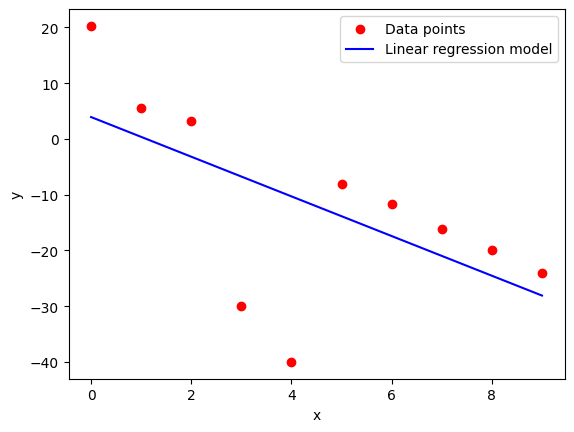

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03])

# Fit linear regression model
model = LinearRegression()
model.fit(x, y)

# Predictions
y_pred = model.predict(x)

print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
print(f"Model: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

# Plot
plt.scatter(x, y, color="red", label="Data points")
plt.plot(x, y_pred, color="blue", label="Linear regression model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [5]:
import numpy as np

# True data points
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03])

# Predictions from both models
y_pred_model1 = -4*x + 12
y_pred_model2 = -3.55*x + 3.91

# Robust loss function
def robust_loss(y_true, y_pred, beta):
    residuals = y_true - y_pred
    return np.mean((residuals**2) / (residuals**2 + beta**2))

# Example for different beta values
betas = [1, 1e-6, 1e3]
for beta in betas:
    L1 = robust_loss(y, y_pred_model1, beta)
    L2 = robust_loss(y, y_pred_model2, beta)
    print(f"β={beta}: Loss Model1={L1:.4f}, Loss Model2={L2:.4f}")


β=1: Loss Model1=0.4354, Loss Model2=0.9728
β=1e-06: Loss Model1=1.0000, Loss Model2=1.0000
β=1000.0: Loss Model1=0.0002, Loss Model2=0.0002


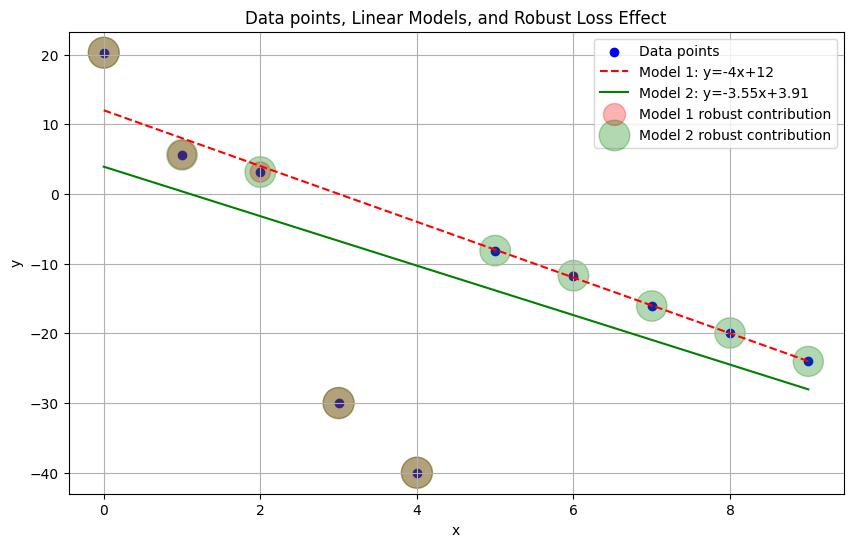

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03])

# Models
y_model1 = -4*x + 12
y_model2 = -3.55*x + 3.91

# Robust loss function for visualization
def robust_term(y_true, y_pred, beta):
    residuals = y_true - y_pred
    return (residuals**2) / (residuals**2 + beta**2)

beta = 1
robust_values_model1 = robust_term(y, y_model1, beta)
robust_values_model2 = robust_term(y, y_model2, beta)

# Plot data and models
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_model1, 'r--', label='Model 1: y=-4x+12')
plt.plot(x, y_model2, 'g-', label='Model 2: y=-3.55x+3.91')

# Plot robust contribution (size proportional to loss)
plt.scatter(x, y, s=robust_values_model1*500, color='red', alpha=0.3, label='Model 1 robust contribution')
plt.scatter(x, y, s=robust_values_model2*500, color='green', alpha=0.3, label='Model 2 robust contribution')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points, Linear Models, and Robust Loss Effect')
plt.legend()
plt.grid(True)
plt.show()


## **Loss Functions**

Prediction	MSE		BCE
0.005		0.99003	5.298
0.010		0.98010	4.605
0.050		0.90250	2.996
0.100		0.81000	2.303
0.200		0.64000	1.609
0.300		0.49000	1.204
0.400		0.36000	0.916
0.500		0.25000	0.693
0.600		0.16000	0.511
0.700		0.09000	0.357
0.800		0.04000	0.223
0.900		0.01000	0.105
1.000		0.00000	-0.000


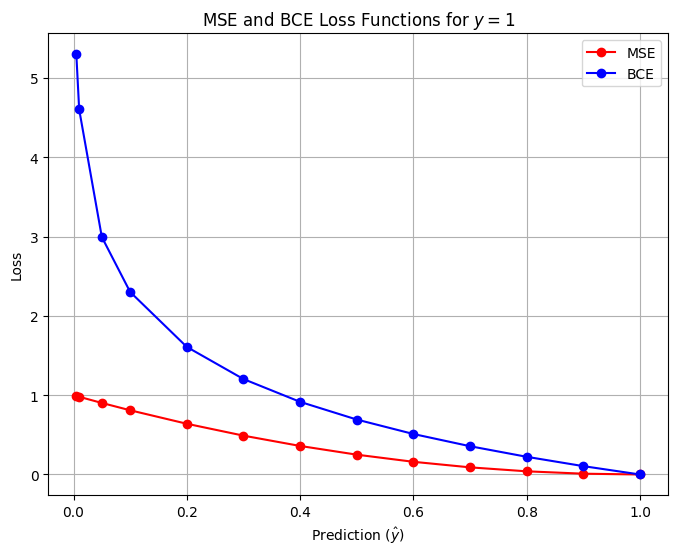

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Predictions for y = 1
y_true = 1
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Mean Squared Error (MSE)
mse = (y_true - y_pred) ** 2

# Binary Cross Entropy (BCE)
# Adding a small value to prevent log(0)
eps = 1e-12
bce = - (y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

# Print table values
print("Prediction\tMSE\t\tBCE")
for yp, m, b in zip(y_pred, mse, bce):
    print(f"{yp:.3f}\t\t{m:.5f}\t{b:.3f}")

# Plot the loss functions
plt.figure(figsize=(8, 6))
plt.plot(y_pred, mse, 'ro-', label='MSE')
plt.plot(y_pred, bce, 'bo-', label='BCE')
plt.xlabel("Prediction ($\\hat{y}$)")
plt.ylabel("Loss")
plt.title("MSE and BCE Loss Functions for $y = 1$")
plt.legend()
plt.grid(True)
plt.show()
